#                                   Project on Healthcare

**DOMAIN:** Healthcare <br>
  **CONTEXT**: Medical research university X is undergoing a deep research on patients with certain conditions.
University has an internal AI team. Due to confidentiality the patient’s details and the conditions are masked by
the client by providing different datasets to the AI team for developing a AIML model which can predict the
condition of the patient depending on the received test results.

<br> **DATA DESCRIPTION**: The data consists of biomechanics features of the patients according to their current
conditions. Each patient is represented in the data set by six biomechanics attributes derived from the shape and
orientation of the condition to their body part.<br>
1. P_incidence
2. P_tilt
3. L_angle
4. S_slope
5. P_radius
6. S_degree
7. Class


<span style="font-family: Arial; font-weight:bold;font-size:2.5em;color:#00b3e5;"> 1. Import the necessary Libraries and warehouse data:

In [1]:
#import necessary libraries required for data processing and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import scipy.stats as stats
%matplotlib inline

import warnings as wn
wn.filterwarnings('ignore')

## i. Load all data and merge all the data into a single data frame

In [2]:
#Read the data providex in CSV format
df1 = pd.read_csv('./Part1 - Normal.csv')
df2 = pd.read_csv('./Part1 - Type_H.csv')
df3 = pd.read_csv('./Part1 - Type_S.csv')

- **Above code will load all 3 dataset given for the model development**

### ii.  Explore shape and size of each data set

In [3]:
#Before merging the data into single data frame cross check if the data have same attributes or not
#data frame 1
print(df1.shape)
df1.head()

(100, 7)


,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [4]:
#data frame 2
print(df2.shape)
df2.head()

(60, 7)


,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


In [5]:
#data frame 3
print(df3.shape)
df3.head()

(150, 7)


,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S


### Merge all three data frame to one dataframe

In [6]:
#Merge all three data frame to one dataframe
com_frames = [df1, df2, df3]
heathcare_data = pd.concat(com_frames) 

In [7]:
#cross check the data after merging the the three dataframe
heathcare_data.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


## ii.Check the Shape and Datatypes

In [8]:
#check the shape of the data
heathcare_data.shape

(310, 7)

- **Health Care Dataset have 7 Attributes and 310 rows of data**

In [9]:
#check the datatypes of each attributes
heathcare_data.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

**Details of each data type:**

- ***P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree*** : data type of these attributes are float64

- ***Class*** :  object datatypes.

In [10]:
#check the datatypes with extra information like if any rows have null data etc..
heathcare_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 19.4+ KB


- ***From above stats its clrear non of the data have null vlaue***
- ***Also its cleared the predictors only have numbers, there is no special character present in data***

<span style="font-family: Arial; font-weight:bold;font-size:2.5em;color:#00b3e5;"> 3. Data Cleansing

## i.Check if any missing values

In [11]:
#check the missing value 
heathcare_data.isnull().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

- ***Non of the attributes have null value***

In [12]:
#check the target variable (Class)
pd.DataFrame(heathcare_data.loc[:,'Class'].value_counts()).sort_index()

,Class
Normal,73
Nrmal,27
Type_H,37
Type_S,133
tp_s,17
type_h,23


- From data it look like **Normal** and **Nrmal** are both same
- **Type_H** and **type_h** are same
- **tp_s** and **Type_S** are both same

- ***Type_H and Type_S we can Change to Abnormal. So it will be having two class data (Normal and Abnormal)***

In [13]:
## keep on copy of original data for checking diffent model scenario like 3 class problem
heathcare_data_old = heathcare_data.copy()

#Change Nrmal to 'Normal' and 'Type_S','tp_s','type_h', 'Type_H' to Abnormal
heathcare_data.loc[(heathcare_data.Class == 'Nrmal'), 'Class'] = 'Normal'
heathcare_data.loc[(heathcare_data.Class.isin(['Type_S','tp_s','type_h', 'Type_H'])), 'Class'] = 'Abnormal'

#corver the object into categorical data type
heathcare_data['Class'] = pd.Categorical(heathcare_data['Class'])

In [14]:
pd.DataFrame(heathcare_data.loc[:,'Class'].value_counts()).sort_index()

,Class
Abnormal,210
Normal,100


- ***There are 100 patients test result is normal and 210 patients test result is Abnormal (Belongs to Type_S and Type_H)***

<span style="font-family: Arial; font-weight:bold;font-size:2.1em;color:#00b3e5;">3. Perform Basic EDA (Exploratory Data analysis & Visualisation):

## i.  5 Point summary of numerical attributes

**The five number summary helps describe the center, spread and shape of data. The five pointssummary are as follows:**
* Minimum
* Q1 - First Quartile(25%)
* Q2 - Econd Quartile (Median- 50%)
* Q3 - Third Quartile (75%)
* Maximum

In [15]:
#check the 5 point summary and other data distribution infromation
heathcare_data.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
P_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
L_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
S_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
P_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
S_Degree,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


- P_incidence is mostly normally distributed with little skewed to right.
- P_tilt is mostly normally distributed with little skewed to right
- L_angle is mostly normally distributed with little skewed to right
- S_slope is nomrally distributed 
- P_radius is mostly normally distributed with littlw skewed to right
- S_Degree is skewed to right

## ii.Univariate Analysis

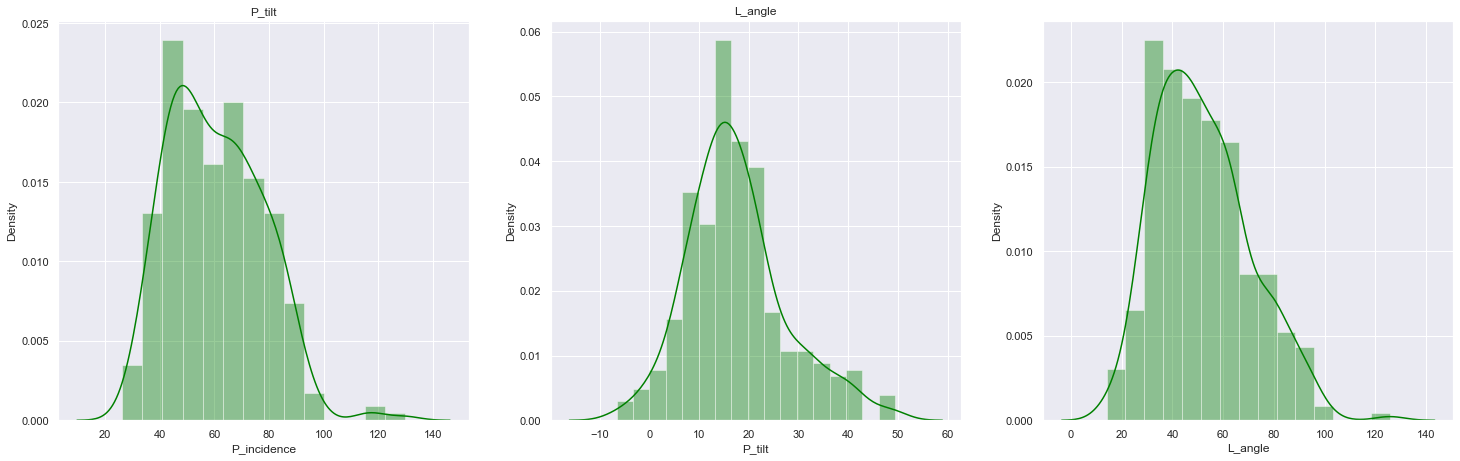

In [16]:
#check the frequency distribution of P_incidence 
plt.figure(figsize=(25, 25))
plt.subplot(3, 3, 1)
plt.title("P_incidence")
sns.distplot(heathcare_data['P_incidence'], color='green');

##check the frequency distribution of P_tilt
plt.title("P_tilt")
plt.subplot(3, 3, 2)
sns.distplot(heathcare_data['P_tilt'], color='green');

##check the frequency distribution of L_angle
plt.title("L_angle")
plt.subplot(3, 3, 3)
sns.distplot(heathcare_data['L_angle'], color='green');

### Observation
- P_incidence is little right skewed.Little more patient P_incidence angle is between 40 to 50 and very less have 90 to 100.
- some exceptional cases where patient have pelvic incidence more than 100.
- Pelvic Title(P_tilt) little rigth skewed.More patients have reading in between 20 to 30.
- Few extreme outlier value between 15 to 18.Rest all eventually distributed
- L_angle looks normally distributed with very little rigth skewed.Most have reading 30 to 70

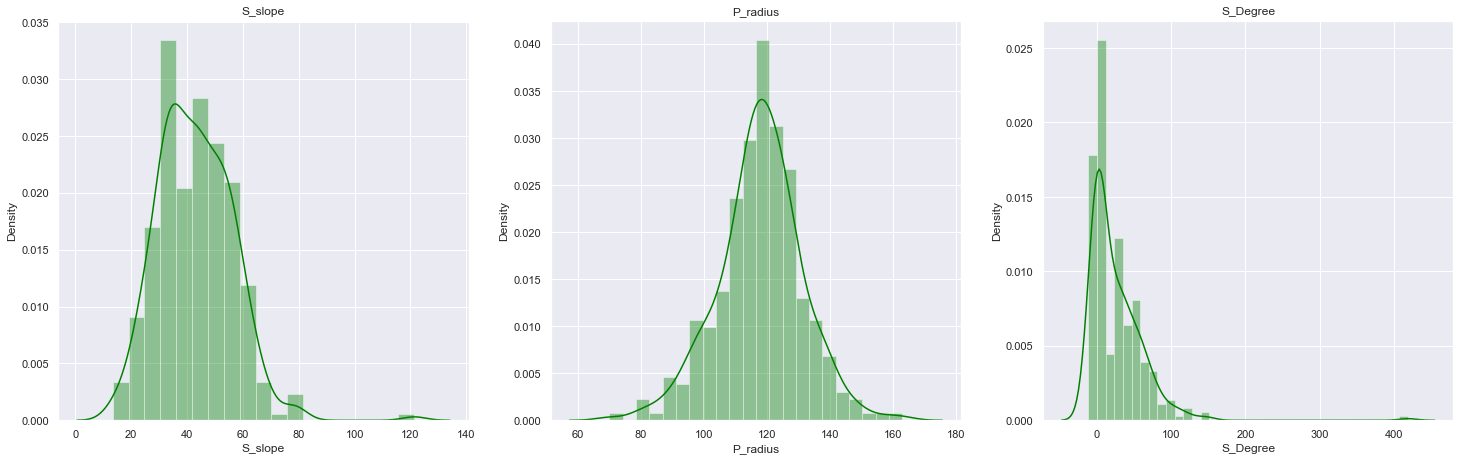

In [17]:
##check the frequency distribution of S_slope
plt.figure(figsize=(25, 25))
plt.subplot(3, 3, 1)
plt.title("S_slope")
sns.distplot(heathcare_data['S_slope'], color='green');

##check the frequency distribution of P_radius
plt.subplot(3, 3, 2)
plt.title("P_radius")
sns.distplot(heathcare_data['P_radius'], color='green');

##check the frequency distribution of S_Degree
plt.subplot(3, 3, 3)
plt.title("S_Degree")
sns.distplot(heathcare_data['S_Degree'], color='green');

### Observation
- Littl high pick between 25 to 30 S_slope value
- Data looks normlly disctributed with few outliers (have extreme value like 120).
- Data looks normally distributed with little skwed to both left and right. High no.of patients have p_radious 120, compare to other.
- S_Degree is righ skewed.High number of patiets have readin between 0 to 10 and very few have some extreme value like more than 100.


## Check the presence of outliers

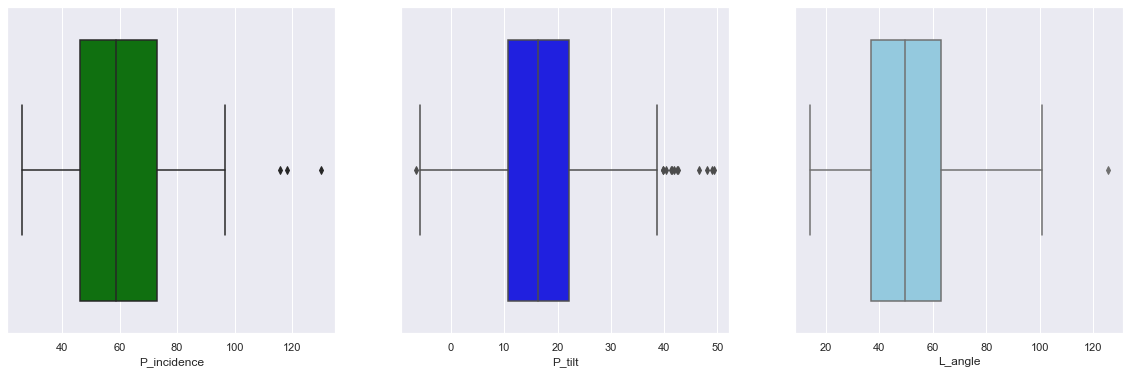

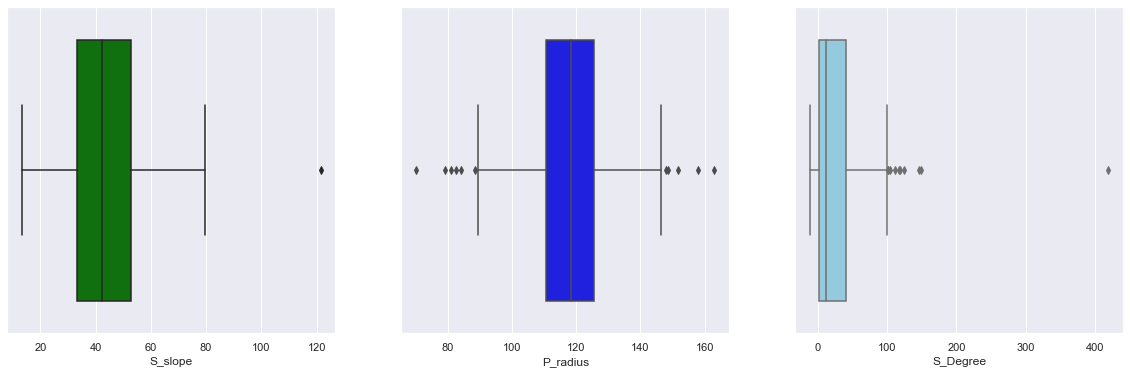

In [18]:
#Box plot to check the outliers in data
#boxplot for P_incidence
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)  
sns.boxplot(data=heathcare_data, x='P_incidence', color='green')

#boxplot for P_tilt
plt.subplot(1, 3, 2)  
sns.boxplot(data=heathcare_data, x='P_tilt', color='blue')

#boxplot for L_angle
plt.subplot(1, 3, 3)  
sns.boxplot(data=heathcare_data, x='L_angle', color='skyblue')


#boxplot for S_slope
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)  
sns.boxplot(data=heathcare_data, x='S_slope', color='green')

#boxplot for P_radius
plt.subplot(1, 3, 2)  
sns.boxplot(data=heathcare_data, x='P_radius', color='blue')

#boxplot for S_Degree
plt.subplot(1, 3, 3)  
sns.boxplot(data=heathcare_data, x='S_Degree', color='skyblue');

### Observation:
- P_radius, P_tilt, S_Degree have more outliers in data.
- L_angle, S_slope, P_incidence have few outliers compare to P_radius, P_tilt, S_Degree.


## Using Quantile-based Flooring and Capping techinque scale outliers

In [19]:
# define a function for identifying the outliers
def find_outliers(data, attribute):
    # sort the attribute
    data.sort_values(by=attribute)
    
    # quartile 25: indicates first quartile
    quartiles_25 = np.percentile(data[attribute], [25]) 
    
    # quartile 25: indicates first quartile
    min_val = min(data[attribute]) 
    max_val = min(data[attribute]) 
    
    # quartile 75: indicates third quartile
    quartiles_75 = np.percentile(data[attribute], [75])
    
    # inter quartile range
    IQR =  quartiles_75 - quartiles_25
    
    # find lower bound q1 - (1.5 *IQR)
    lower_fence = quartiles_25 - (1.5 * IQR)
    
    # find upper bound  q3 - (1.5 *IQR)
    upper_fence = quartiles_75  + (1.5 * IQR )
    
    print ('Presense Of Outliers In ' + attribute.upper())
    print ('---------------------------')

    print (attribute + '     : quartile_75 : ', quartiles_75, 
           '\n'+ attribute+ ': quartile_25 : ', quartiles_25, 
           '\n'+ attribute+ ': IQR : ', IQR, 
           '\n'+ attribute+ ': lower_bound : ', lower_fence, 
           '\n'+ attribute+ ': upper_bound : ', upper_fence)
    
    print (attribute + ': Any data lower than : ', np.around(lower_fence, decimals = 2) , 
           ' and upper than :' , np.around(upper_fence, decimals = 2) , ' is considered as outlier')
    
    #print(data[data[attribute].values > upper_fence][attribute]  )
    
    #since very few out lieres are there we can use Quantile-based Flooring and Capping techinque scale outliers
    quartiles_10 = np.percentile(data[attribute], [10])
    quartiles_90 = np.percentile(data[attribute], [90])
    data[attribute] = np.where(data[attribute].values < quartiles_10, quartiles_10, data[attribute])
    data[attribute] = np.where(data[attribute].values > quartiles_90, quartiles_90, data[attribute])
    
    print(data[data[attribute].values > upper_fence][attribute]  )

In [20]:
##P_radius and S_Degree have many outlier. Replace with Quantile-based Flooring and Capping techinque scale outliers
find_outliers(heathcare_data,'S_Degree')
print('')
find_outliers(heathcare_data,'P_radius')
print('')
find_outliers(heathcare_data,'P_tilt')

Presense Of Outliers In S_DEGREE
---------------------------
S_Degree     : quartile_75 :  [41.28735196] 
S_Degree: quartile_25 :  [1.60372667] 
S_Degree: IQR :  [39.68362529] 
S_Degree: lower_bound :  [-57.92171126] 
S_Degree: upper_bound :  [100.8127899]
S_Degree: Any data lower than :  [-57.92]  and upper than : [100.81]  is considered as outlier
Series([], Name: S_Degree, dtype: float64)

Presense Of Outliers In P_RADIUS
---------------------------
P_radius     : quartile_75 :  [125.46767443] 
P_radius: quartile_25 :  [110.7091963] 
P_radius: IQR :  [14.75847813] 
P_radius: lower_bound :  [88.57147911] 
P_radius: upper_bound :  [147.60539161]
P_radius: Any data lower than :  [88.57]  and upper than : [147.61]  is considered as outlier
Series([], Name: P_radius, dtype: float64)

Presense Of Outliers In P_TILT
---------------------------
P_tilt     : quartile_75 :  [22.12039474] 
P_tilt: quartile_25 :  [10.66706906] 
P_tilt: IQR :  [11.45332568] 
P_tilt: lower_bound :  [-6.51291946] 

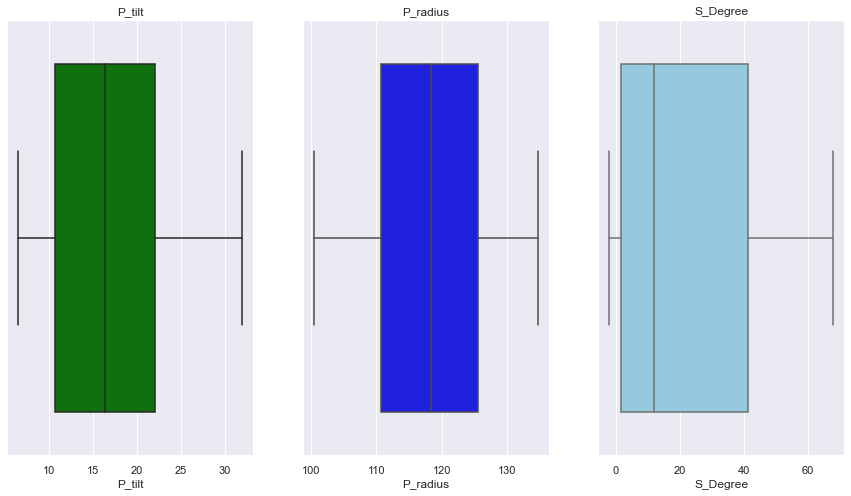

In [21]:
#Box plot to check the outliers in data after scaling the data
#boxplot for P_incidence
#boxplot for S_slope
plt.figure(figsize=(15,8))
plt.subplot(1, 3, 1)  
plt.title('P_tilt')
sns.boxplot(data=heathcare_data, x='P_tilt', color='green')

#boxplot for P_radius
plt.subplot(1, 3, 2)  
plt.title('P_radius')
sns.boxplot(data=heathcare_data, x='P_radius', color='blue')

#boxplot for S_Degree
plt.subplot(1, 3, 3)  
plt.title('S_Degree')
sns.boxplot(data=heathcare_data, x='S_Degree', color='skyblue');

- **No outliers present in P_tilt, P_radius and S_Degree. Already we have replaced with Quantile-based Flooring and Capping techinque**

## iii.Plot for categorical variable (Target Variable)

Abnormal    210
Normal      100
Name: Class, dtype: int64

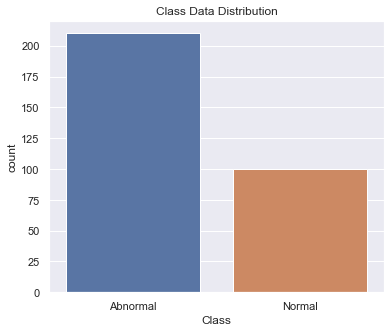

In [22]:
#check the target class how it disctributed
plt.figure(figsize=(6, 5))
plt.title("Class Data Distribution")
sns.countplot(data=heathcare_data, x='Class')
heathcare_data.loc[:,'Class'].value_counts()

- **There are 210 test show patients Abnormal condition (belongs with eith Type_S or Type_H)**
- **100 patients are Normal**

## vi.Bivariate Analysis

##### Correlation

In [23]:
#Check the correlation matrix between the predictors
predictors_df = heathcare_data.drop('Class', axis=1)
corr_matrix = predictors_df.corr()
corr_matrix

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
P_incidence,1.000000,0.638843,0.717282,0.814960,-0.269301,0.697921
P_tilt,0.638843,1.000000,0.457650,0.099264,0.022067,0.480431
L_angle,0.717282,0.457650,1.000000,0.598387,-0.089794,0.704710
S_slope,0.814960,0.099264,0.598387,1.000000,-0.360920,0.534072
P_radius,-0.269301,0.022067,-0.089794,-0.360920,1.000000,-0.133119
S_Degree,0.697921,0.480431,0.704710,0.534072,-0.133119,1.000000


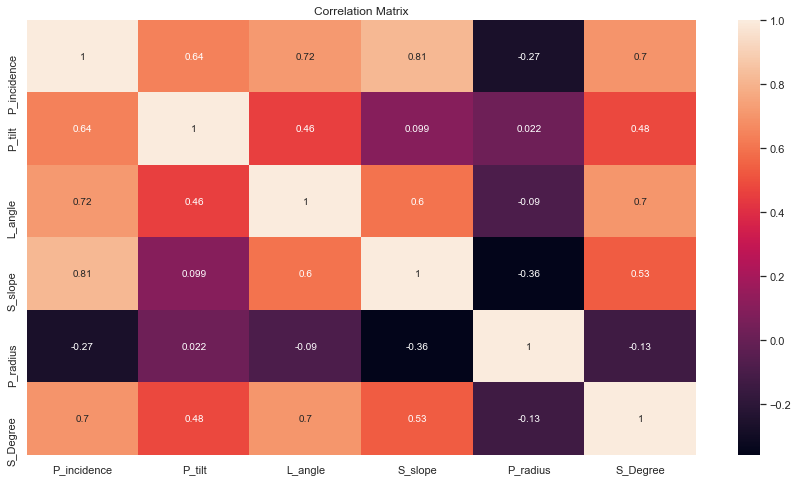

In [24]:
#Heatmap for correlation matrix
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Correlation Matrix')
sns.heatmap(corr_matrix, annot=True, ax=ax);

### Correlation Matrix Observation:
- S_slope, L_angle have little high correlation with P_incidence and mild correlation with p_tilt and S_Degree.
- All other attributes don't much correlation among each other.

##### Crossplots

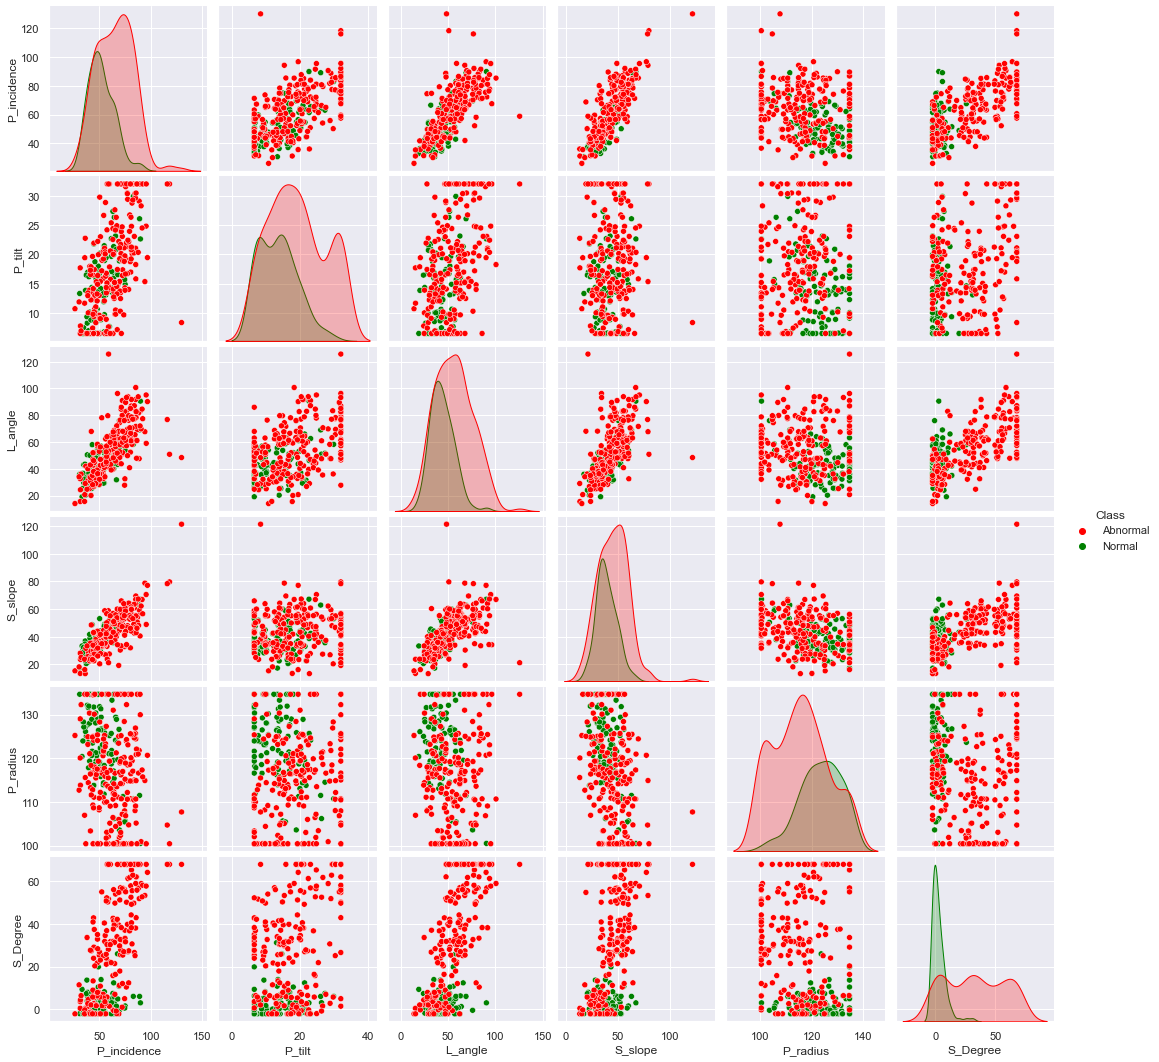

In [25]:
#plot the relation with each other using pair plot
sns.pairplot(data=heathcare_data, hue='Class', palette=['red','green']);

### Observation
- S_slope, L_angle have little high correlation with P_incidence and mild correlation with p_tilt and S_Degree

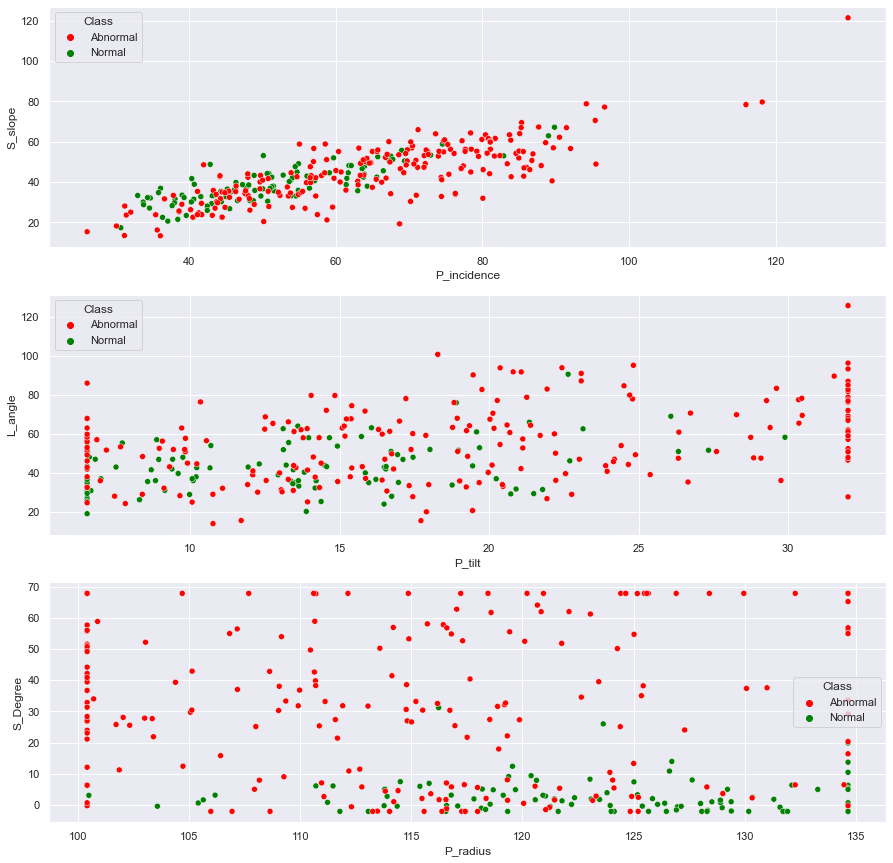

In [26]:
#check the distribution of predictors with target class
plt.figure(figsize=(15,15))
plt.subplot(3,1,1)
sns.scatterplot(heathcare_data.P_incidence, heathcare_data.S_slope, hue = heathcare_data['Class'], palette= ['red','green']);

plt.subplot(3,1,2)
sns.scatterplot(heathcare_data.P_tilt, heathcare_data.L_angle, hue = heathcare_data['Class'], palette= ['red','green']);

plt.subplot(3,1,3)
sns.scatterplot(heathcare_data.P_radius, heathcare_data.S_Degree, hue = heathcare_data['Class'], palette= ['red','green']);

### Observation
- P_incidence and S_slope data looks highly correlated.
- S_Degree is higer then most are abnormal.
- P_title is more than 25 most are abnormal.

<span style="font-family: Arial; font-weight:bold;font-size:2.5em;color:#00b3e5;"> 4. Data pre-processing:

### Spliting Data Into Training and Test Data

In [27]:
#Import sciket lean packate for split train and test set
from sklearn.model_selection import train_test_split

##Change the Class attributes Normal= 0 and Abnormal =1 
heathcare_data['Class'] = heathcare_data['Class'].map({'Normal': 0, 'Abnormal': 1})

#Split data into x and y axis
X = heathcare_data.drop('Class', axis=1)
y = np.array(heathcare_data['Class'])

#Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [28]:
#Check the data Split Ratio
print("{0:0.2f}% data is in training set".format((len(X_train)/len(heathcare_data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(heathcare_data.index)) * 100))

80.00% data is in training set
20.00% data is in test set


- **Since most of data looks like same scale feature scaling not required.**
- **First I am training the model without scaling then i ll scale the data check if any changes in model score**

<span style="font-family: Arial; font-weight:bold;font-size:2.5em;color:#00b3e5;">5. Model training, testing and tuning:

# Model - 1

In [29]:
#import the model class
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
#print(accuracy_score(y_test, y_pred))
print('Test_accuracy  with K = 3 is :' ,knn.score(X_test, y_test))
print('Train Accurary with K = 3 is :' ,knn.score(X_train, y_train))
print('Recall Score   with K = 3 is :' ,recall_score(y_test, y_pred))

Test_accuracy  with K = 3 is : 0.9193548387096774
Train Accurary with K = 3 is : 0.9193548387096774
Recall Score   with K = 3 is : 0.9534883720930233


### Observation
- when K = 3 from model score looks fine.
- Recall score also lookd very good.
- Let check with different K value and find the accurary and then finalize the best K value

In [30]:
#Run the KNN with no of neighbours to be 1,3,5..19 and Find the optimal number of neighbours from the above list
#classification error
# creating odd list of K for KNN
myList = list(range(1,20))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
   
    # predict the response
    y_pred = knn.predict(X_test)
   
    # evaluate accuracy
    test_score  = accuracy_score(y_test, y_pred)
    train_score = knn.score(X_train, y_train)
    ac_scores.append(test_score)
    
    print('K value:', k)
    print('Training score:',train_score)
    print('Test score    :',test_score, '\n')
    
# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]

K value: 1
Training score: 1.0
Test score    : 0.8870967741935484 

K value: 3
Training score: 0.9193548387096774
Test score    : 0.9193548387096774 

K value: 5
Training score: 0.875
Test score    : 0.9032258064516129 

K value: 7
Training score: 0.8548387096774194
Test score    : 0.8709677419354839 

K value: 9
Training score: 0.875
Test score    : 0.8709677419354839 

K value: 11
Training score: 0.8588709677419355
Test score    : 0.8548387096774194 

K value: 13
Training score: 0.8669354838709677
Test score    : 0.8387096774193549 

K value: 15
Training score: 0.8790322580645161
Test score    : 0.8387096774193549 

K value: 17
Training score: 0.8548387096774194
Test score    : 0.8548387096774194 

K value: 19
Training score: 0.8548387096774194
Test score    : 0.8387096774193549 



**Analysis of differnct K value**
-  when K value 1 the model give training data accuracy nearly 100% but test test accuracy is 88%, it means the Model is overfit with k = 1
- When k = 3, 9, 11 and 17 looks like model prediction for train and test data nearly same.
- When k values is 5 and 7 model is little underfit
- So we can consider k = 3 is best fit for the model. Since train and test score looks good and model overal score is good.

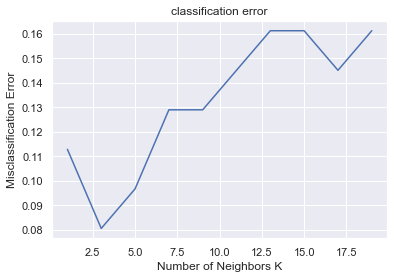

In [31]:
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.title('classification error');

- **From Classification error graph, its indicate when K approches to 3 classification error is less then after it sudden spike**

In [32]:
#Setup arrays to store training and test accuracies
myList = list(range(1,20))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

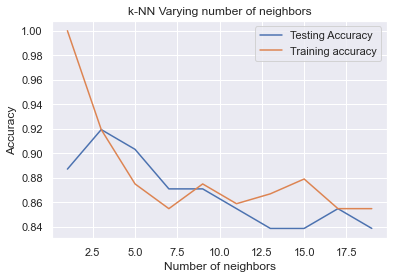

In [33]:
#Generate plot training vs testing scrore for differnt K value
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

### Observation
- **when k = 1 model training accuracy is 100%. its clearly showing the model is overfit**
- **when k = 3 both train and test score is nearly same**
- **when k > 3 and k < 9 model is uderfitting**
- **when k > 9 and k < 17 model is verfitting also the accuracy coming down**

In [34]:
#Use k=3 as the final model for prediction
knn = KNeighborsClassifier(n_neighbors = 3)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
#print(accuracy_score(y_test, y_pred))
print('Train Accurary with K = 3 is :' ,knn.score(X_train, y_train))
print('Test_accuracy  with K = 3 is :' ,knn.score(X_test, y_test))
print('Recall Score   with K = 3 is :' ,recall_score(y_test, y_pred))

Train Accurary with K = 3 is : 0.9193548387096774
Test_accuracy  with K = 3 is : 0.9193548387096774
Recall Score   with K = 3 is : 0.9534883720930233


### Making the Confusion Matrix

[[16  3]
 [ 2 41]]

 Model Accuracy_score: 0.9193548387096774


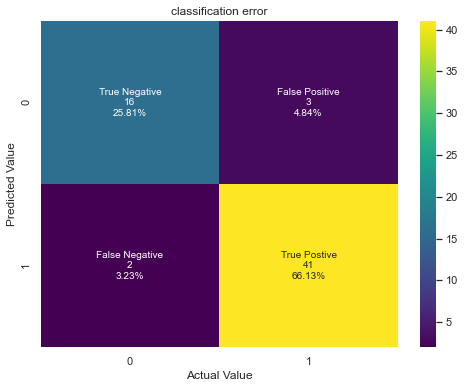

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('\n Model Accuracy_score:',accuracy_score(y_test, y_pred))


grp_name = ['True Negative' ,'False Positive', 'False Negative',  'True Postive']
grp_counts = ["{0:0.0f}". format(value) for value in cm.flatten()]
grp_perc = ["{0:0.2%}". format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(grp_name, grp_counts, grp_perc)]

#plot heatmap
plt.figure(figsize=(8,6))
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, cmap="viridis", fmt='')
#plt.xticks([0.5,1.5],labels=[1,0])
#plt.yticks([0.5,1.5],labels=[1,0])
plt.title('Confusion matrix');
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('classification error');

### Observation
- As for the above analysis it clearly showing with K = 3 model prediction is very good.
- Accuracy score is nearly 92% and Recal score is 95%.

### Conclusion:
- So we can consider 3 is the best value for K to train the model.

In [36]:
# Classification stats report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86        19
           1       0.93      0.95      0.94        43

    accuracy                           0.92        62
   macro avg       0.91      0.90      0.90        62
weighted avg       0.92      0.92      0.92        62



- **From model stats report show the recall and precision score is good for K = 3**

### ROC Curve

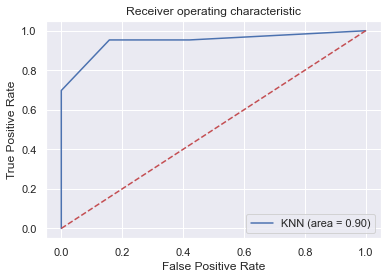

In [37]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

knn_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')

- **Area under curve is morethan 90% is a good sign**

# Model - 2

## Check Model Score by dropping high corrlation attributes

In [38]:
### P_incidence have high correlation with S_slope
# drop P_incidence and check the model scroe and classification error
#Split the data 

#Split data into x and y axis
X1 = heathcare_data.drop(['Class', 'P_incidence'], axis=1)
y1 = np.array(heathcare_data['Class'])

#Split the data into training and test set
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 2)


In [39]:
#Run the KNN with no of neighbours to be 1,3,5..19 and Find the optimal number of neighbours from the above list
#classification error
# creating odd list of K for KNN
myList = list(range(1,20))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold accuracy scores
ac_scores_1 = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn1 = KNeighborsClassifier(n_neighbors=k)
    knn1.fit(X1_train, y1_train)
   
    # predict the response
    y1_pred = knn1.predict(X1_test)
   
    # evaluate accuracy
    test_score_1  = accuracy_score(y1_test, y1_pred)
    train_score_1 = knn1.score(X1_train, y1_train)
    ac_scores_1.append(test_score_1)
    
    print('K value:', k)
    print('Training score:',train_score_1)
    print('Test score    :',test_score_1, '\n')
    
# changing to misclassification error
MSE = [1 - x for x in ac_scores_1]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]

K value: 1
Training score: 1.0
Test score    : 0.9193548387096774 

K value: 3
Training score: 0.9233870967741935
Test score    : 0.9193548387096774 

K value: 5
Training score: 0.8951612903225806
Test score    : 0.9032258064516129 

K value: 7
Training score: 0.875
Test score    : 0.8870967741935484 

K value: 9
Training score: 0.8669354838709677
Test score    : 0.8870967741935484 

K value: 11
Training score: 0.8588709677419355
Test score    : 0.8709677419354839 

K value: 13
Training score: 0.8548387096774194
Test score    : 0.8548387096774194 

K value: 15
Training score: 0.8467741935483871
Test score    : 0.8548387096774194 

K value: 17
Training score: 0.8548387096774194
Test score    : 0.8548387096774194 

K value: 19
Training score: 0.8669354838709677
Test score    : 0.8548387096774194 



- **From above data looks like nothing much change in model score. With K = 3 model score is good like before but now the training score little increase but not impact on test score. So overally no change in prediction.**

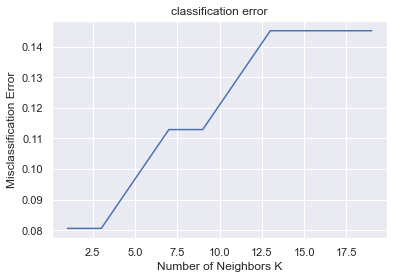

In [40]:
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.title('classification error');

In [41]:
cm = confusion_matrix(y1_test, y1_pred)
print(cm)
print('Train Accurary with K = 3 is :' ,knn1.score(X1_train, y1_train))
print('Test_accuracy  with K = 3 is :' ,knn1.score(X1_test, y1_test))
print('Recall Score   with K = 3 is :' ,recall_score(y1_test, y1_pred))

[[16  3]
 [ 6 37]]
Train Accurary with K = 3 is : 0.8669354838709677
Test_accuracy  with K = 3 is : 0.8548387096774194
Recall Score   with K = 3 is : 0.8604651162790697


- **As we can see compare the first Model the model accuracy is gone down**

# Model - 3

## Apply Feature Scaling and Check the Accuracy

In [42]:
#apply standard scaller
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X2_train = sc.fit_transform(X_train)
X2_test = sc.transform(X_test)

In [43]:
#Run the KNN with no of neighbours to be 1,3,5..19 and Find the optimal number of neighbours from the above list
#classification error
# creating odd list of K for KNN
myList = list(range(1,20))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn2 = KNeighborsClassifier(n_neighbors=k)
    knn2.fit(X2_train, y_train)
   
    # predict the response
    y2_pred = knn2.predict(X2_test)
   
    # evaluate accuracy
    test_score_2  = accuracy_score(y_test, y2_pred)
    train_score_2 = knn.score(X2_train, y_train)
    ac_scores.append(test_score_2)
    
    print('K value:', k)
    print('Training score:',train_score_2)
    print('Test score    :',test_score_2, '\n')
    
# changing to misclassification error
MSE2 = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]

K value: 1
Training score: 0.6733870967741935
Test score    : 0.8548387096774194 

K value: 3
Training score: 0.6733870967741935
Test score    : 0.8709677419354839 

K value: 5
Training score: 0.6733870967741935
Test score    : 0.8064516129032258 

K value: 7
Training score: 0.6733870967741935
Test score    : 0.8548387096774194 

K value: 9
Training score: 0.6733870967741935
Test score    : 0.8387096774193549 

K value: 11
Training score: 0.6733870967741935
Test score    : 0.8225806451612904 

K value: 13
Training score: 0.6733870967741935
Test score    : 0.8064516129032258 

K value: 15
Training score: 0.6733870967741935
Test score    : 0.8064516129032258 

K value: 17
Training score: 0.6733870967741935
Test score    : 0.8064516129032258 

K value: 19
Training score: 0.6733870967741935
Test score    : 0.8225806451612904 



- **As we can see after applying the feature scalling the model is mostly going for underfitting For different K value. So need to apply the feature scalling**

# Model- 4

## Consider  Class Attributes Into 3 Class Problme (Normal, Type_S, Type_H)

**Note:** Most of predictor analayis for univaiate and bivariate remain same for 3 class problem.

In [44]:
#Change Nrmal to Normal and 'Type_S','tp_s','type_h', 'Type_H' to Abnormal
heathcare_data_old.loc[(heathcare_data_old.Class == 'Nrmal'), 'Class'] = 'Normal'
heathcare_data_old.loc[(heathcare_data_old.Class.isin(['Type_S','tp_s'])), 'Class'] = 'Type_S'
heathcare_data_old.loc[(heathcare_data_old.Class.isin(['type_h', 'Type_H'])), 'Class'] = 'Type_H'

#corver the object into categorical data type
heathcare_data_old['Class'] = pd.Categorical(heathcare_data_old['Class'])

In [45]:
pd.DataFrame(heathcare_data_old.loc[:,'Class'].value_counts()).sort_index()

,Class
Normal,100
Type_H,60
Type_S,150


- 100 Normal Patients
- 60 Type_H Patients
- 150 Type_S Patients

- Both Type_H and Type_S are assume to be Abnormal patients

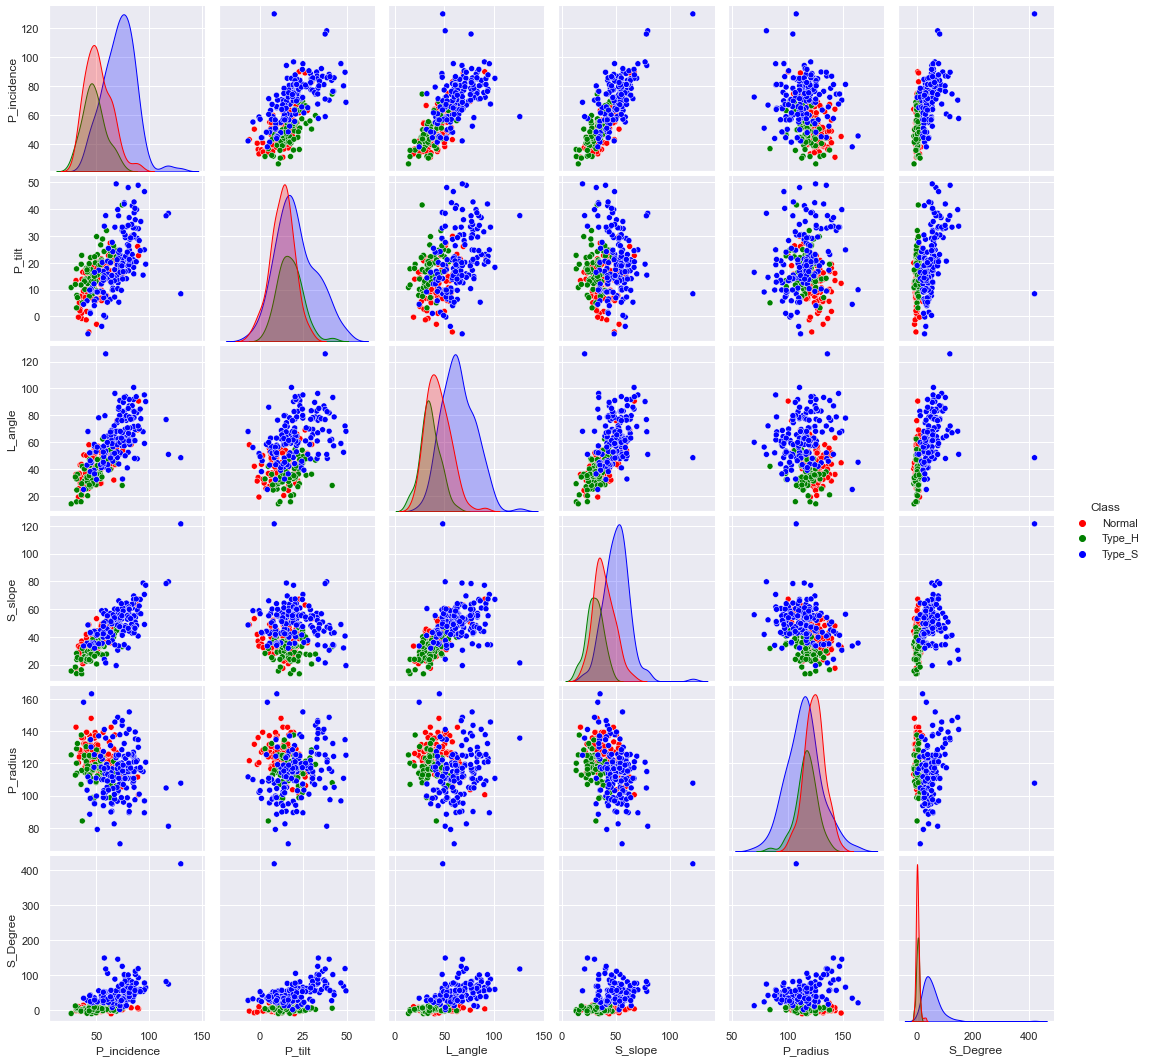

In [46]:
#plot the relation with each other using pair plot
sns.pairplot(data=heathcare_data_old, hue='Class', palette=['red','green', 'blue']);

### Observation
- when 'P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree' values higher then most of patients belongs to Type_S.
- As we saw from counts for different class Type_S patiets are more compare to Type_H and Normal.

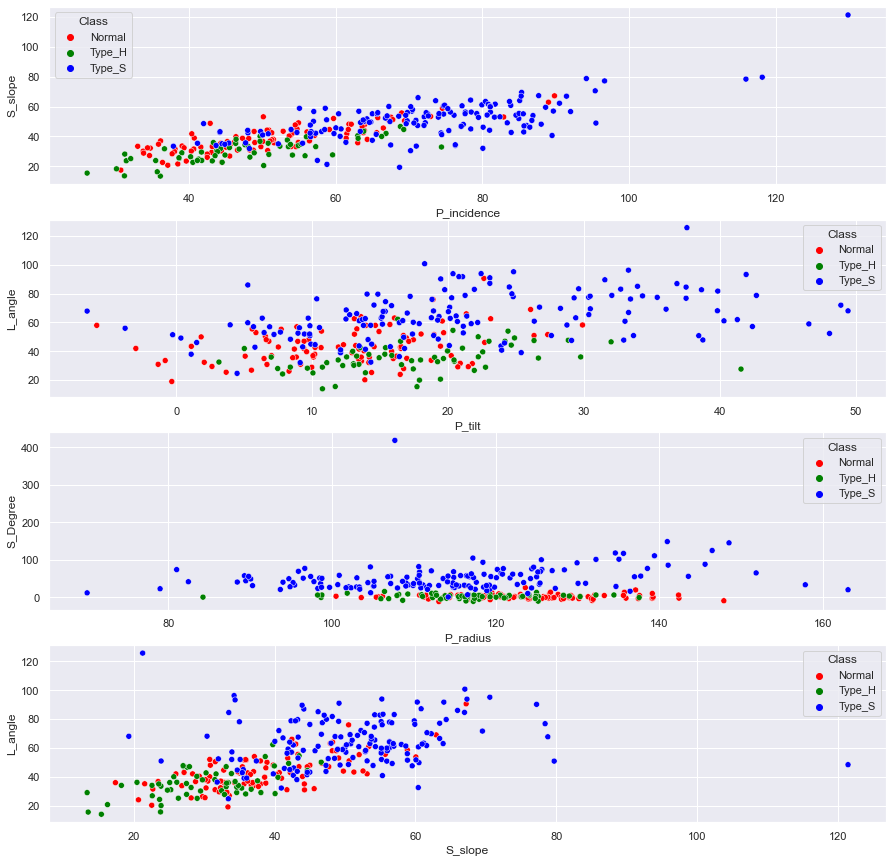

In [47]:
#check the distribution of predictors with target class
plt.figure(figsize=(15,15))
plt.subplot(4,1,1)
sns.scatterplot(heathcare_data_old.P_incidence, heathcare_data_old.S_slope, hue = heathcare_data_old['Class'], palette= ['red','green','blue']);

plt.subplot(4,1,2)
sns.scatterplot(heathcare_data_old.P_tilt, heathcare_data_old.L_angle, hue = heathcare_data_old['Class'], palette= ['red','green','blue']);

plt.subplot(4,1,3)
sns.scatterplot(heathcare_data_old.P_radius, heathcare_data_old.S_Degree, hue = heathcare_data_old['Class'], palette= ['red','green','blue']);

plt.subplot(4,1,4)
sns.scatterplot(heathcare_data_old.S_slope, heathcare_data_old.L_angle, hue = heathcare_data_old['Class'], palette= ['red','green','blue']);

### Observation:
- when 'P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree' values higher then most of patients belongs to Type_S.
- When S_Degree is low and high patients belongs to Type_S.
- Most of Type_H patients have low pareditors attributes value compare to Type_S patients.

## Spliting Data Into Training and Test Data¶

In [48]:
#Import sciket lean packate for split train and test set
from sklearn.model_selection import train_test_split

##Change the Class attributes Normal= 0 and Abnormal =1 
heathcare_data_old['Class'] = heathcare_data_old['Class'].map({'Normal': 0, 'Type_H': 1, 'Type_S': 2})

#Split data into x and y axis
X = heathcare_data_old.drop('Class', axis=1)
y = np.array(heathcare_data_old['Class'])

#Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

- Splited the data into 80% for training and 20% for testing.

## Model training, testing and tuning:

In [49]:
#Run the KNN with no of neighbours to be 1,3,5..19 and Find the optimal number of neighbours from the above list
#classification error
# creating odd list of K for KNN
myList = list(range(1,20))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
   
    # predict the response
    y_pred = knn.predict(X_test)
   
    # evaluate accuracy
    test_score  = accuracy_score(y_test, y_pred)
    train_score = knn.score(X_train, y_train)
    ac_scores.append(test_score)
    
    print('K value:', k)
    print('Training score:',train_score)
    print('Test score    :',test_score, '\n')
    
# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]

K value: 1
Training score: 1.0
Test score    : 0.8709677419354839 

K value: 3
Training score: 0.9233870967741935
Test score    : 0.8387096774193549 

K value: 5
Training score: 0.8669354838709677
Test score    : 0.8225806451612904 

K value: 7
Training score: 0.875
Test score    : 0.8709677419354839 

K value: 9
Training score: 0.8629032258064516
Test score    : 0.7903225806451613 

K value: 11
Training score: 0.8467741935483871
Test score    : 0.8225806451612904 

K value: 13
Training score: 0.8548387096774194
Test score    : 0.8064516129032258 

K value: 15
Training score: 0.8548387096774194
Test score    : 0.8225806451612904 

K value: 17
Training score: 0.842741935483871
Test score    : 0.8548387096774194 

K value: 19
Training score: 0.8387096774193549
Test score    : 0.8548387096774194 



### Observation
- When K = 3 Model Training score is 92% but Test Score is approximatly 84%. Little over fit the model.
- When K = 7 Both Train and Test score is approximaly 87%.
- We Check the confusion Matrix and Model statistics to chose the best K value.

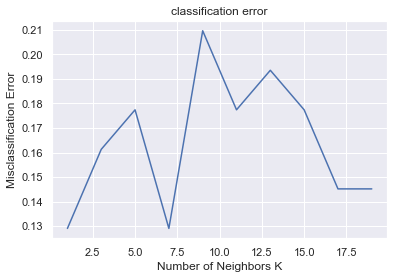

In [50]:
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.title('classification error');

- We can observe when K = 7 the error is minimal.

In [51]:
#Use k=7 as the final model for prediction
knn = KNeighborsClassifier(n_neighbors = 7)

# fitting the model
Train_score = knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
#print(accuracy_score(y_test, y_pred))
print('Train Accurary with K = 7 is :' ,Train_score)
print('Test_accuracy  with K = 7 is :' ,knn.score(X_test, y_test))
print('\n')
print(classification_report(y_test, y_pred))

Train Accurary with K = 7 is : KNeighborsClassifier(n_neighbors=7)
Test_accuracy  with K = 7 is : 0.8709677419354839


              precision    recall  f1-score   support

           0       0.72      0.95      0.82        19
           1       0.83      0.45      0.59        11
           2       1.00      0.97      0.98        32

    accuracy                           0.87        62
   macro avg       0.85      0.79      0.80        62
weighted avg       0.88      0.87      0.86        62



[[18  1  0]
 [ 6  5  0]
 [ 1  0 31]]

 Model Accuracy_score: 0.8709677419354839


<AxesSubplot:>

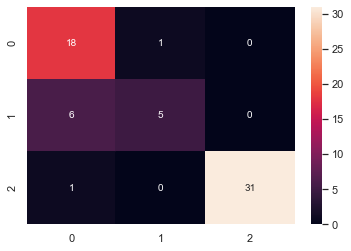

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('\n Model Accuracy_score:',accuracy_score(y_test, y_pred))
sns.heatmap(cm, annot=True)